In [1]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

Getting the files to plot:

In [2]:
final_df_years = pd.read_json('../../queried/final_output/normal.json')
final_df_journal = pd.read_json('../../queried/final_output/by_journal.json')

In [3]:
final_df_journal['subject'] = final_df_journal['subject'].apply(lambda x: [y['term'] for y in x])

Getting the errors data.

In [4]:
errors = pd.read_json('../../queried/final_output/errors.json')

Getting the data of the biggest journal of DOAJ.

In [5]:
group_journals = final_df_journal.groupby(['title'])['cited', 'citing', 'citations_to_DOAJ', 'cited_by_DOAJ'].sum()

PLoS ONE is the biggest journal of DOAJ in terms of the number of all types of citations.

In [6]:
group_journals.idxmax()

cited                PLoS ONE
citing               PLoS ONE
citations_to_DOAJ    PLoS ONE
cited_by_DOAJ        PLoS ONE
dtype: object

In [7]:
final_df_journal_1 = final_df_journal[final_df_journal['title'] == group_journals['citing'].idxmax()]

General information about number of citations and references. 
The cited_by_DOAJ and citations_to_DOAJ numbers are the same, as expected, since our study is about citations inside the same dataset.

In [8]:
print(final_df_journal[['cited', 'citing', 'cited_by_DOAJ', 'citations_to_DOAJ']].sum(axis=0))

cited                 35965730
citing               112497915
cited_by_DOAJ         10548308
citations_to_DOAJ     10548308
dtype: int64


Plotting the number of journals per subject inside DOAJ

In [9]:
exploded = final_df_journal.explode('subject')
grouped_df = exploded.groupby(['subject', 'year']
                          ).size().reset_index(name="num_journals")
grouped_df = grouped_df.sort_values(['num_journals'], ascending=False)

most_journals_by_subject = grouped_df.drop_duplicates(subset=['subject']).head(20)['subject'].tolist()
grouped_df = grouped_df.loc[grouped_df['year']>1999].sort_values(['year','num_journals'], ascending=False)

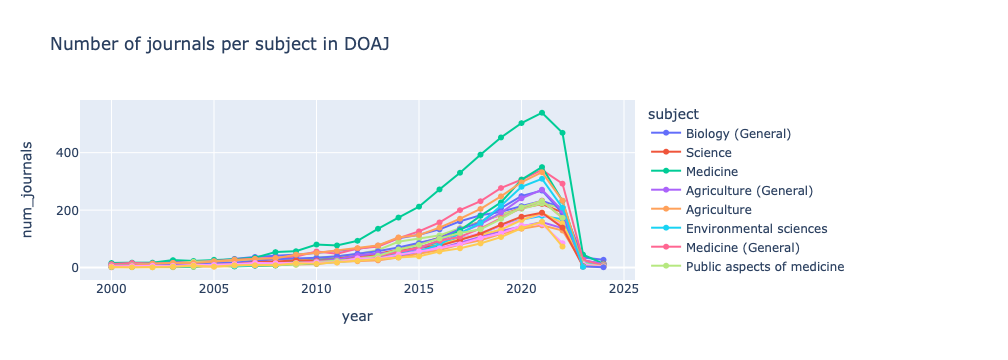

In [10]:
grouped_df_fig = px.line(grouped_df.loc[grouped_df['subject'].isin(most_journals_by_subject)], x="year", y="num_journals", color="subject", markers=True, title="Number of journals per subject in DOAJ")
grouped_df_fig.show()

General plots for the 30 most citing, cited, open citing and open cited journals:

In [11]:
group_journals = final_df_journal.groupby(['title'], as_index=False).agg({'dois_count':'first','subject':'first','cited':'sum', 'citing':'sum', 'self_citation':'sum','citations_to_DOAJ':'sum', 'cited_by_DOAJ':'sum'})

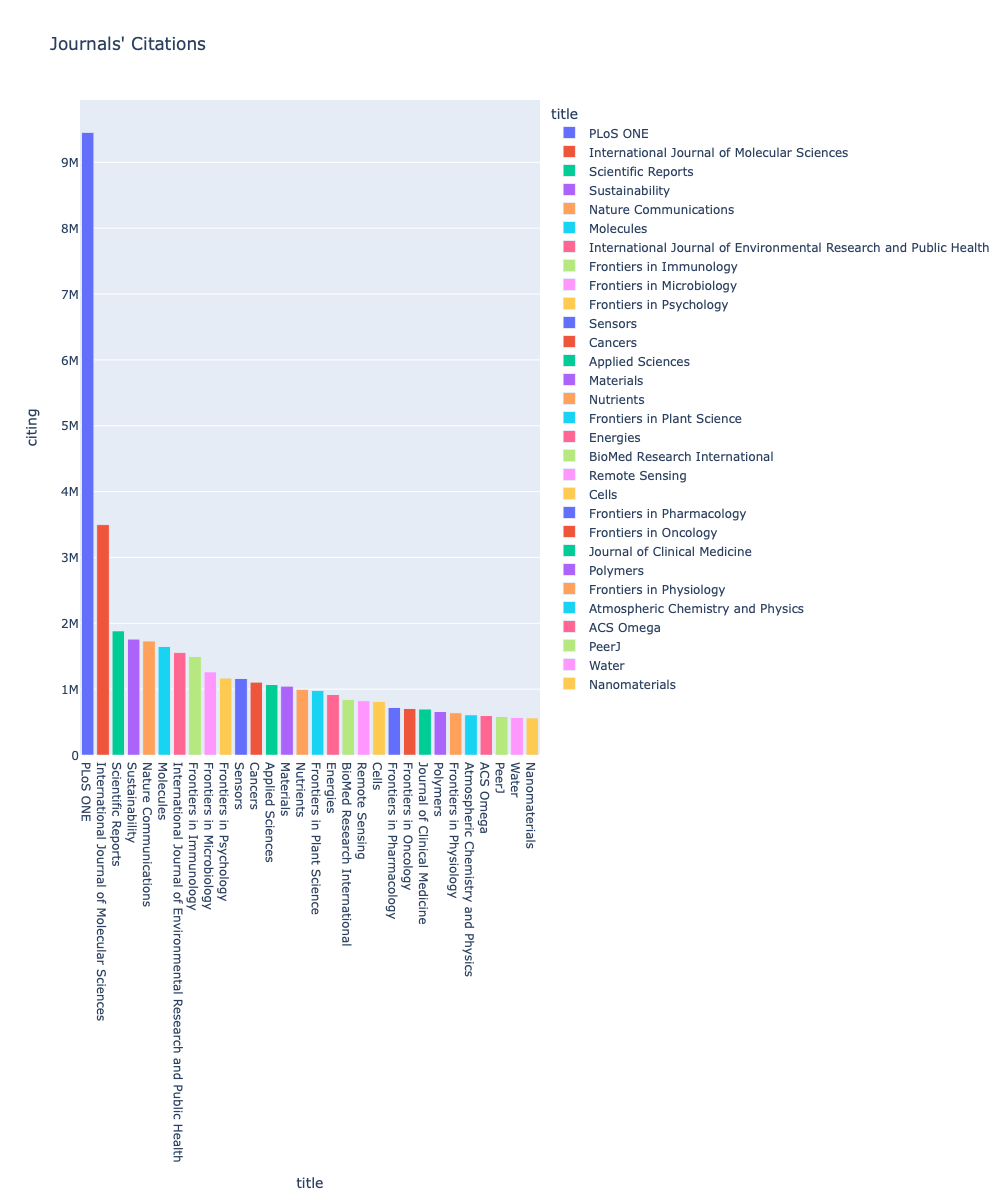

In [12]:
df_sorted_by_citing = group_journals.sort_values('citing', ascending=False).reset_index()
plot_sorted_by_citing = px.bar(df_sorted_by_citing.iloc[:30,:], x='title', y='citing',
             hover_data=['citing'], color='title',
             title="Journals' Citations", height=1200, width=1200)
plot_sorted_by_citing.show()

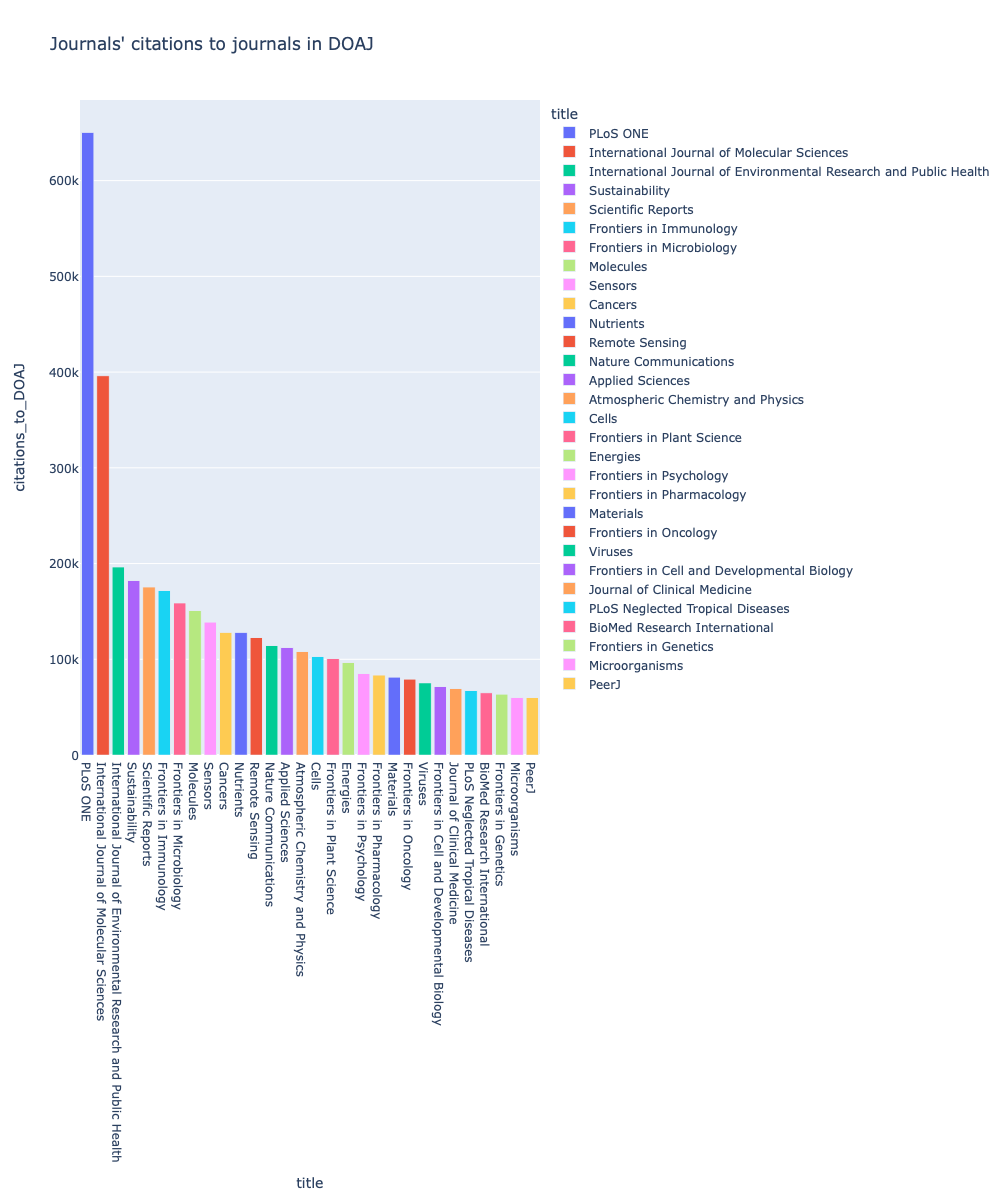

In [13]:
df_sorted_by_open_citing = group_journals.sort_values('citations_to_DOAJ', ascending=False).reset_index()
plot_sorted_by_open_citing = px.bar(df_sorted_by_open_citing.iloc[:30,:], x='title', y='citations_to_DOAJ',
             hover_data=['citations_to_DOAJ'], color='title',
             title='Journals\' citations to journals in DOAJ', height=1200, width=1200)
plot_sorted_by_open_citing.show()

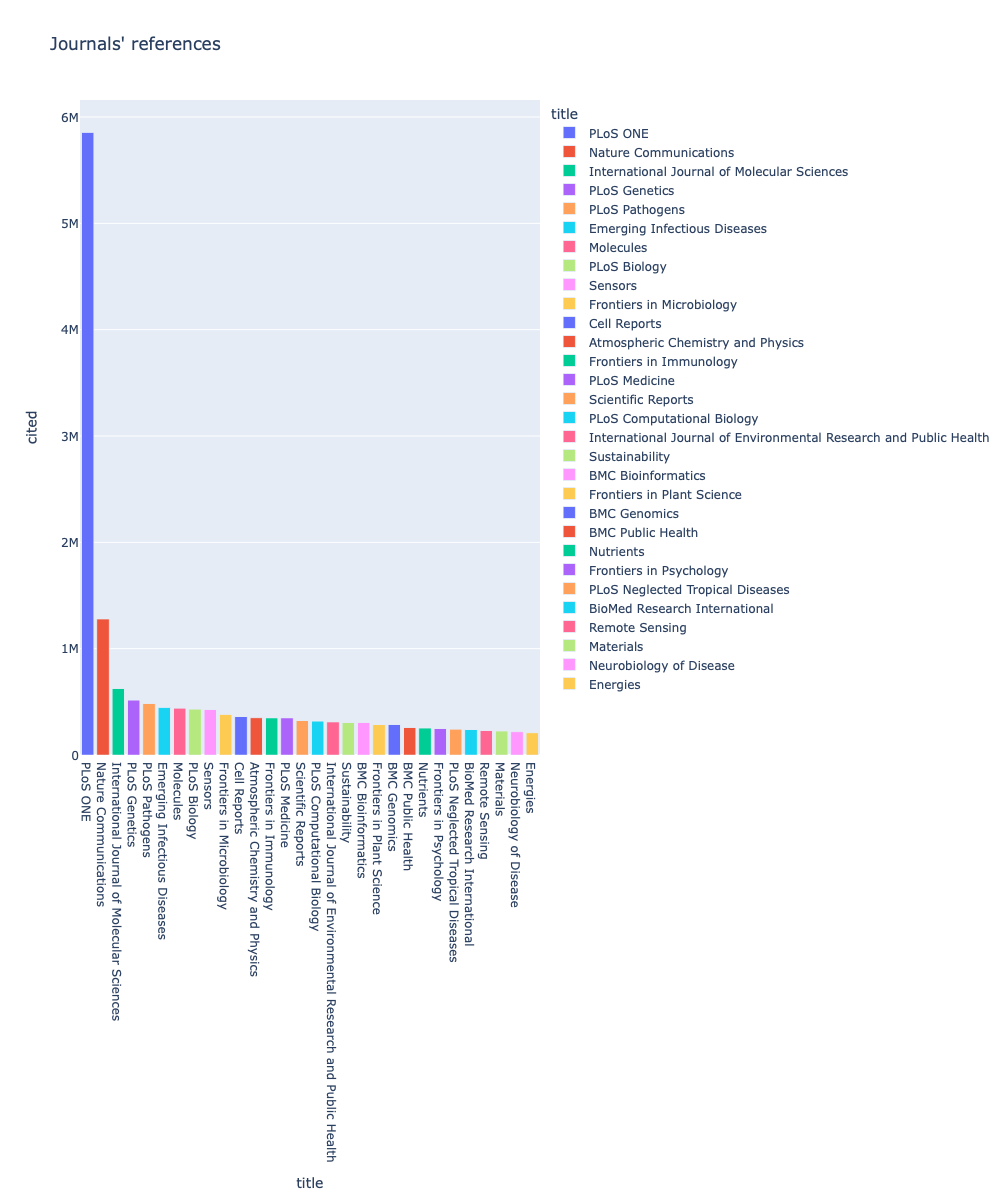

In [14]:
df_sorted_by_cited = group_journals.sort_values('cited', ascending=False).reset_index()
plot_sorted_by_cited = px.bar(df_sorted_by_cited.iloc[:30,:], x='title', y='cited',
             hover_data=['cited'], color='title',
             title='Journals\' references', height=1200, width=1200)
plot_sorted_by_cited.show()

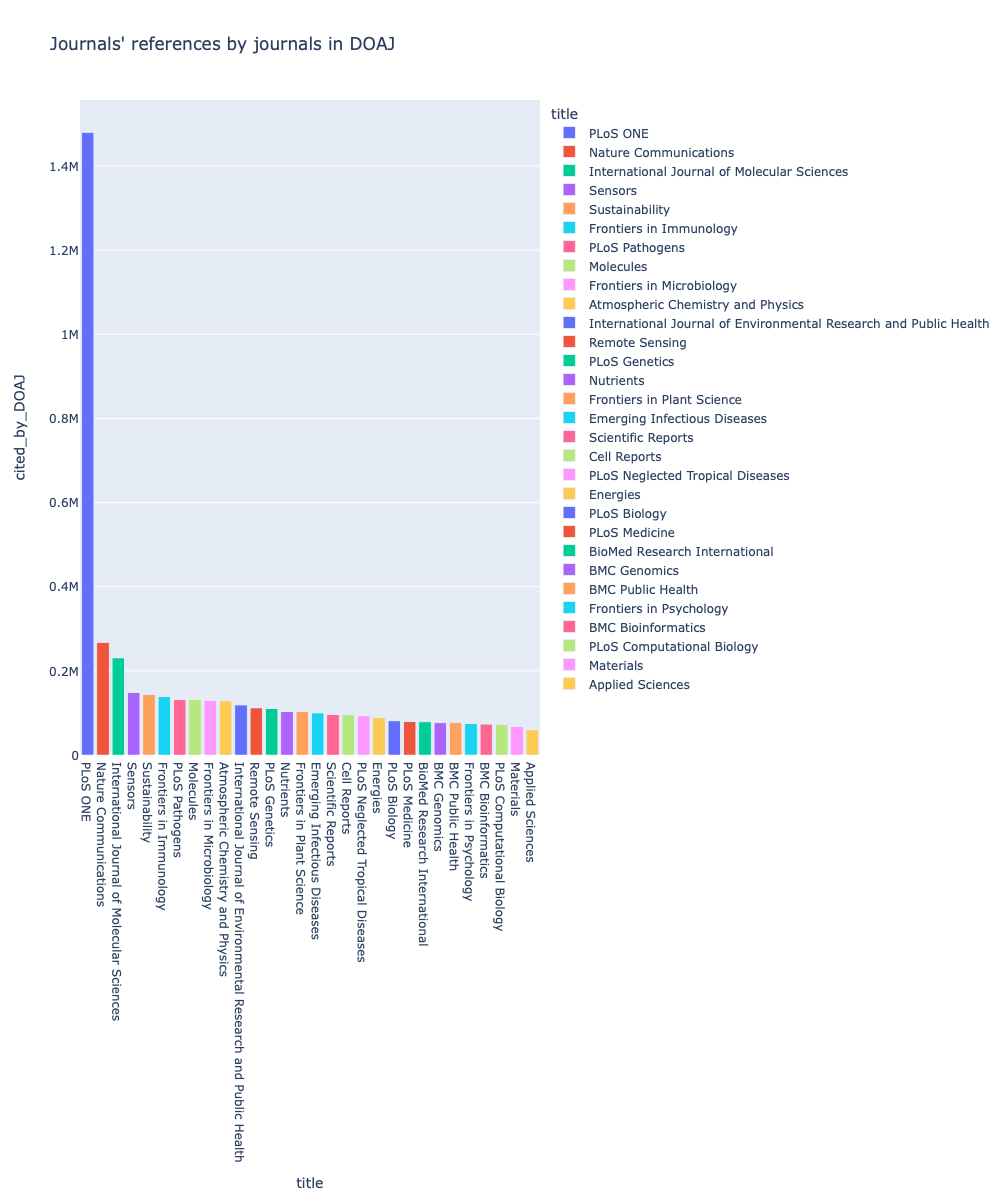

In [15]:
df_sorted_by_open_cited = group_journals.sort_values('cited_by_DOAJ', ascending=False).reset_index()
plot_sorted_by_open_cited = px.bar(df_sorted_by_open_cited.iloc[:30,:], x='title', y='cited_by_DOAJ',
             hover_data=['cited_by_DOAJ'], color='title',
             title='Journals\' references by journals in DOAJ', height=1200, width=1200)
plot_sorted_by_open_cited.show()

Same plots but with the addition of the information about the number of articles indexed:

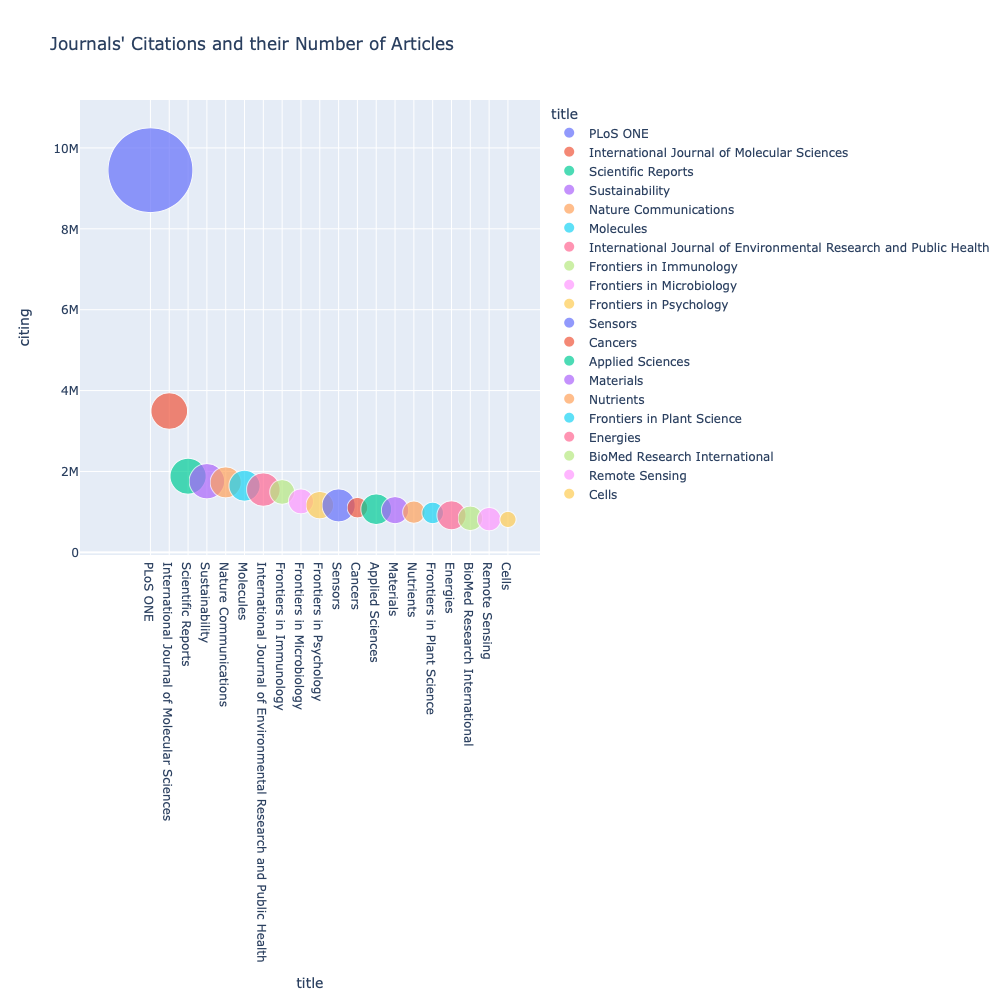

In [16]:
sorted_by_citing_with_num_dois = px.scatter(df_sorted_by_citing.iloc[:20,:], x="title", y="citing",
                                            size="dois_count", color="title",  title="Journals' Citations and their Number of Articles",
                                            hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_citing_with_num_dois.show()

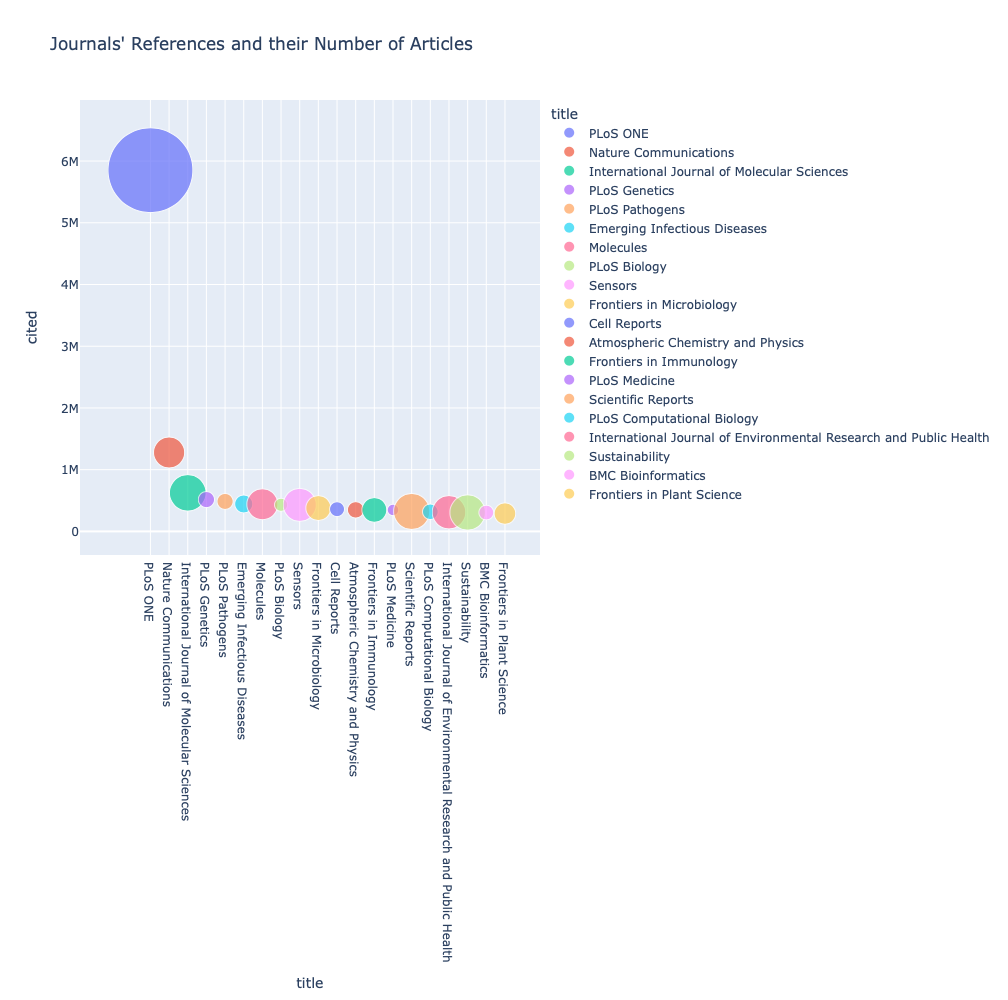

In [17]:
sorted_by_cited_with_num_dois = px.scatter(df_sorted_by_cited.iloc[:20,:], x="title", y="cited",
                                           size="dois_count", color="title", title="Journals' References and their Number of Articles",
                                           hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_cited_with_num_dois.show()

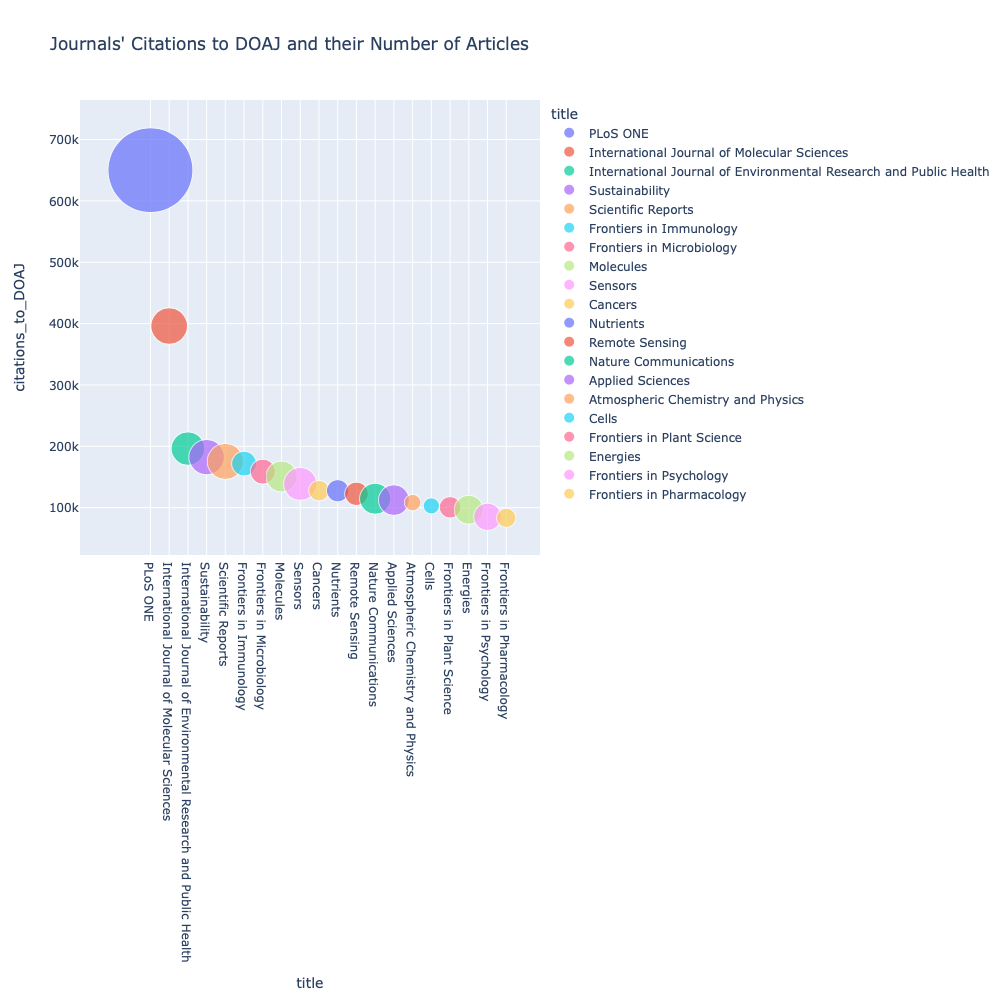

In [18]:
sorted_by_open_citing_with_num_dois = px.scatter(df_sorted_by_open_citing.iloc[:20,:], x="title", y="citations_to_DOAJ",
                                                 size="dois_count", color="title", title="Journals' Citations to DOAJ and their Number of Articles",
                                                 hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_open_citing_with_num_dois.show()

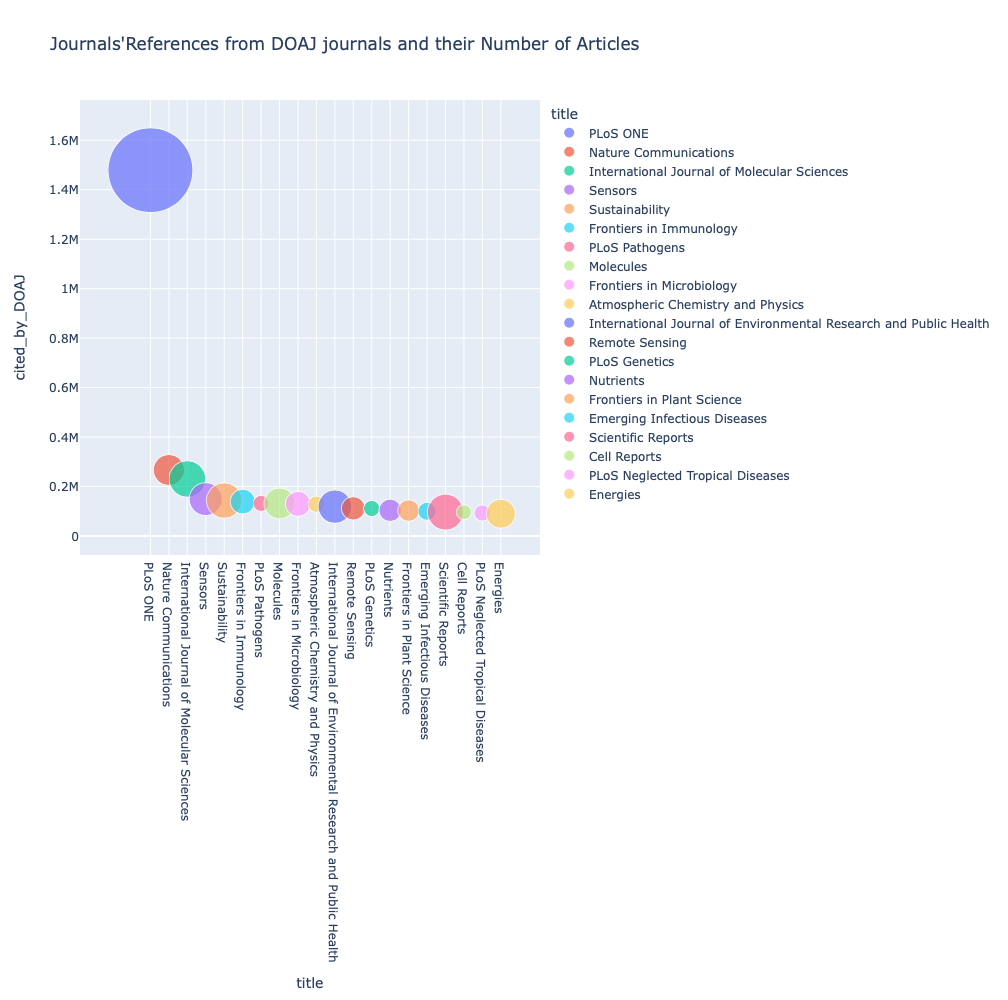

In [19]:
sorted_by_open_cited_with_num_dois = px.scatter(df_sorted_by_open_cited.iloc[:20,:], x="title", y="cited_by_DOAJ",
                                                size="dois_count", color="title", title="Journals'References from DOAJ journals and their Number of Articles",
                                                hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_open_cited_with_num_dois.show()

Plotting journals by self-citations: selecting the 20 most self-citing journals and plotting the results for the last 22 years.

In [20]:
self_citations_df = final_df_journal.sort_values(["self_citation"], ascending =False)

In [21]:
list_journals = self_citations_df.drop_duplicates(['journal']).head(20)['title'].tolist()
most_self_cit = self_citations_df.loc[self_citations_df['title'].isin(list_journals)]
most_self_cit = most_self_cit[most_self_cit.year > 1999].sort_values(['year'])

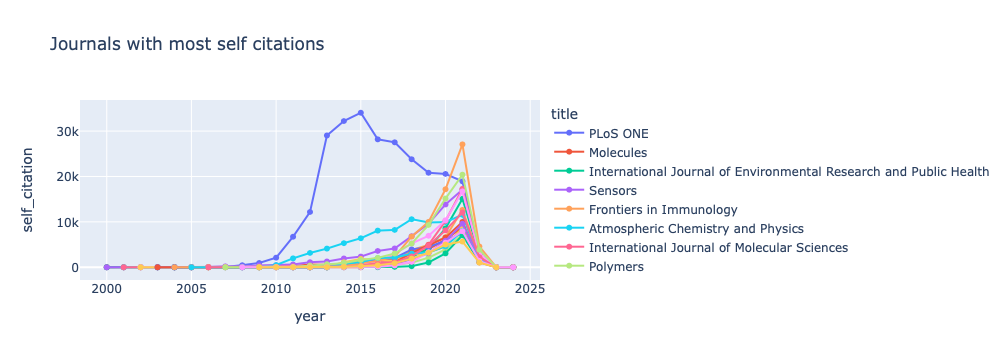

In [22]:
self_citing_journals_fig = px.line(most_self_cit, x="year", y="self_citation", color="title", title="Journals with most self citations",markers=True)
self_citing_journals_fig.show()

Plotting the comparison between the citing and cited numbers.

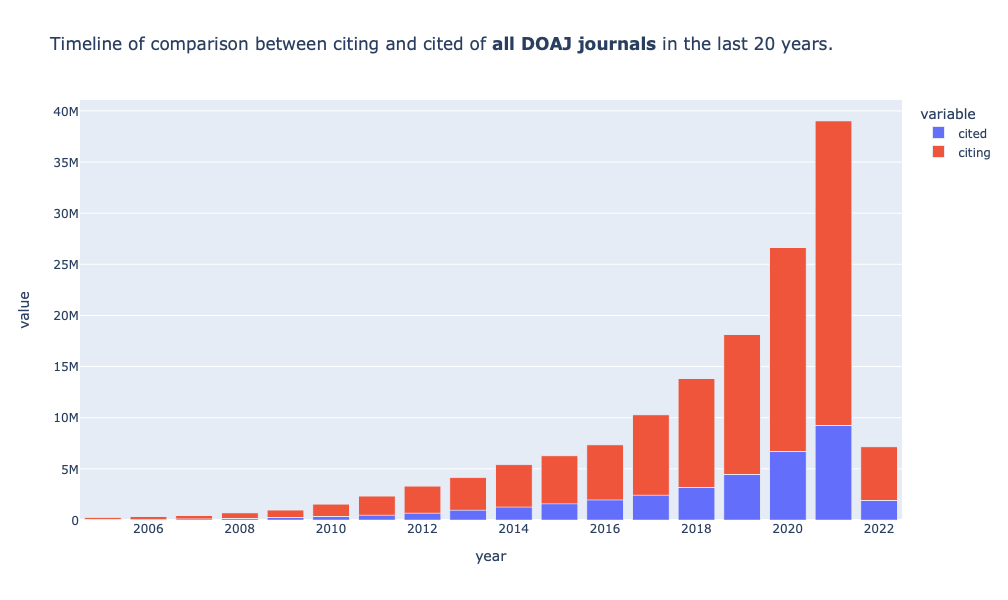

In [23]:
comp_years_fig = px.bar(final_df_years[-20:-2], x='year', y=['cited','citing'], 
             title='Timeline of comparison between citing and cited of <b>all DOAJ journals</b> in the last 20 years.',
             height=600)
comp_years_fig.show()

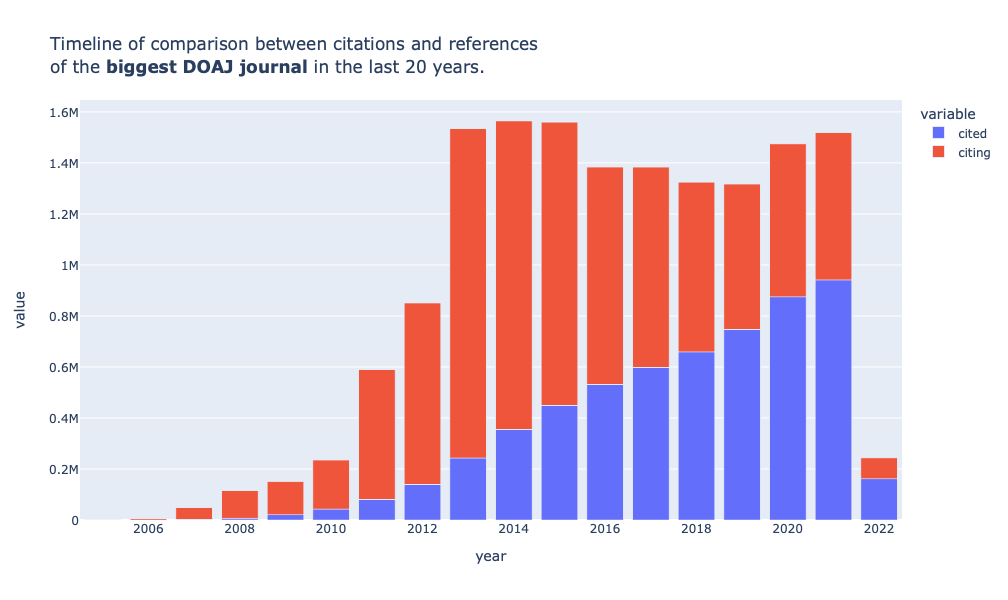

In [24]:
comp_years_jrnl_fig = px.bar(final_df_journal_1[-20:-2], x='year', y=['cited','citing'], 
             title='Timeline of comparison between citations and references <br> of the <b>biggest DOAJ journal</b> in the last 20 years.',
             height=600)
comp_years_jrnl_fig.show()

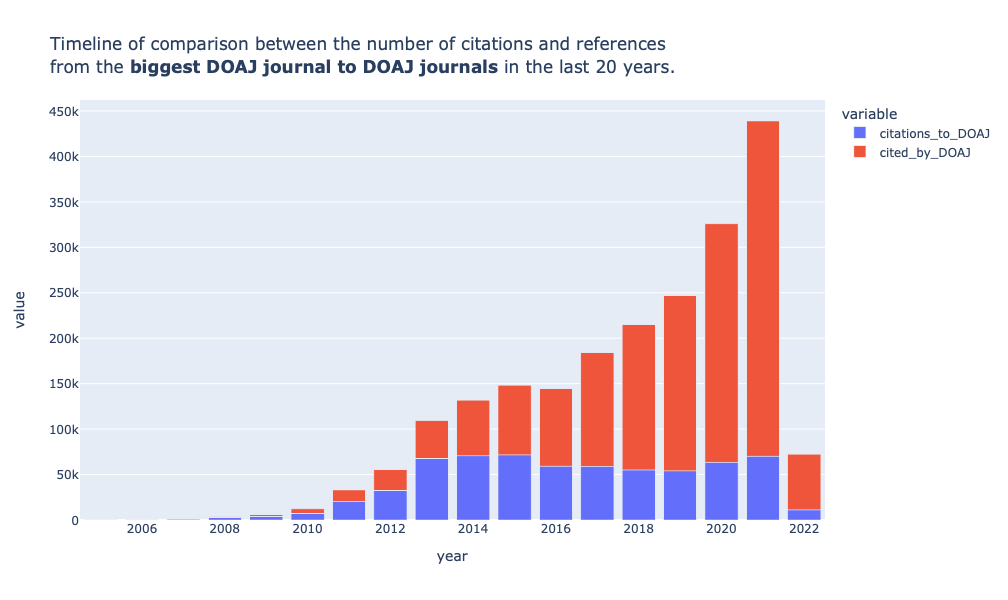

In [25]:
comp_years_jrnl_pcent_fig = px.bar(final_df_journal_1[-20:-2], x='year', y=['citations_to_DOAJ','cited_by_DOAJ'], 
             title='Timeline of comparison between the number of citations and references <br> from the <b>biggest DOAJ journal to DOAJ journals</b> in the last 20 years.',
             height=600)
comp_years_jrnl_pcent_fig.show()

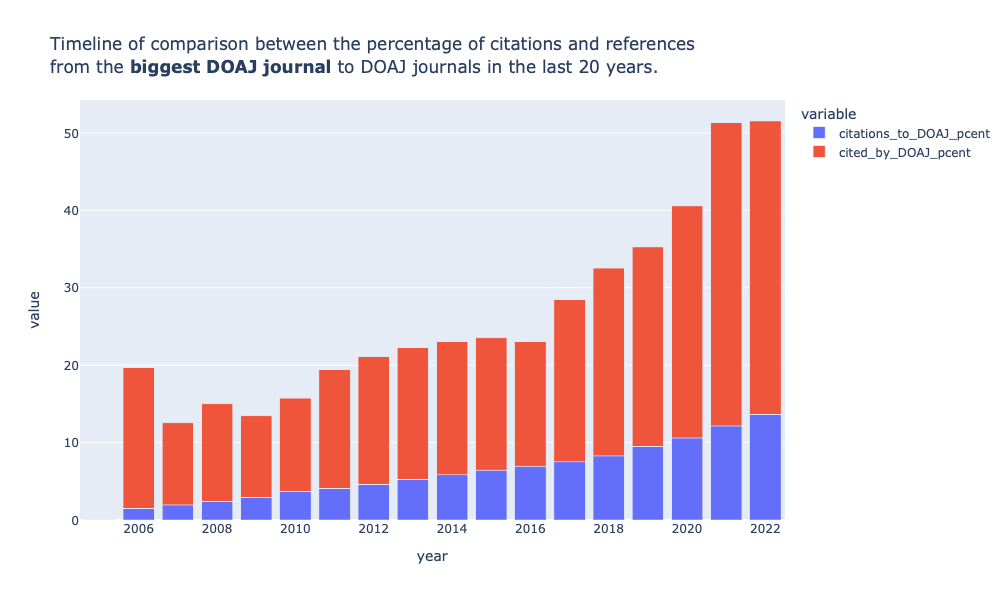

In [26]:
comp_years_fig_journal = px.bar(final_df_journal_1[-20:-2], x='year', y=['citations_to_DOAJ_pcent','cited_by_DOAJ_pcent'], 
             title='Timeline of comparison between the percentage of citations and references <br> from the <b>biggest DOAJ journal</b> to DOAJ journals in the last 20 years.',
             height=600)
comp_years_fig_journal.show()

Plotting timelines of percentages of citations.

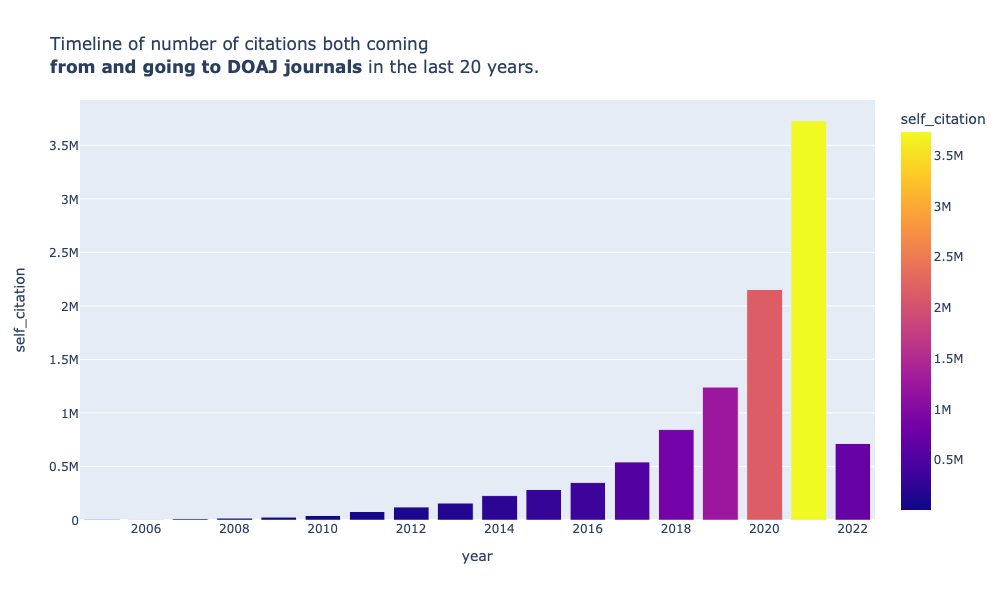

In [28]:
cit_num_years_fig = px.bar(final_df_years[-20:-2], x='year', y='self_citation', 
             hover_data=['self_citation'],
             title='Timeline of number of citations both coming <br><b>from and going to DOAJ journals</b> in the last 20 years.', 
             color='self_citation',
             height=600)
cit_num_years_fig.show()

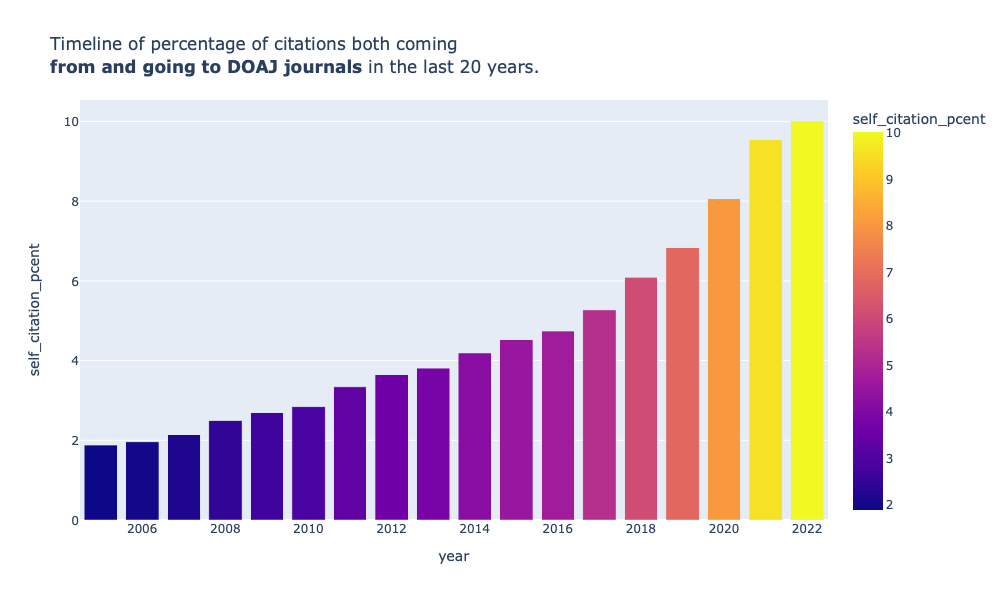

In [29]:
cit_pcent_years_fig = px.bar(final_df_years[-20:-2], x='year', y='self_citation_pcent', 
             hover_data=['self_citation_pcent'],
             title='Timeline of percentage of citations both coming <br><b>from and going to DOAJ journals</b> in the last 20 years.', 
             color='self_citation_pcent',
             height=600)
cit_pcent_years_fig.show()

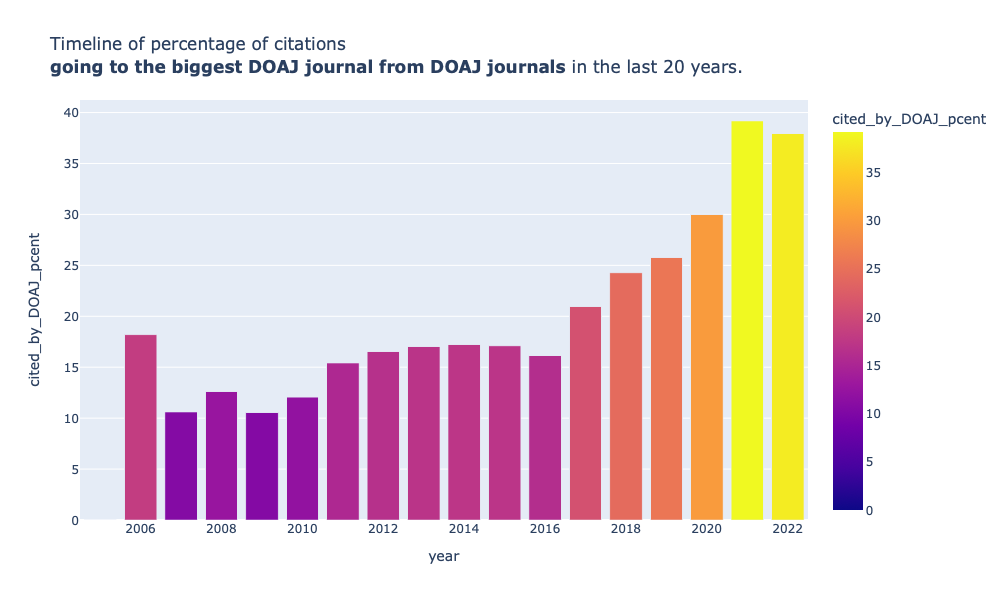

In [30]:
citby_jrnl_fig = px.bar(final_df_journal_1[-20:-2], x='year', y='cited_by_DOAJ_pcent', 
             hover_data=['cited_by_DOAJ_pcent'],
             title='Timeline of percentage of citations <br><b>going to the biggest DOAJ journal from DOAJ journals</b> in the last 20 years.', 
             color='cited_by_DOAJ_pcent',
             height=600)
citby_jrnl_fig.show()

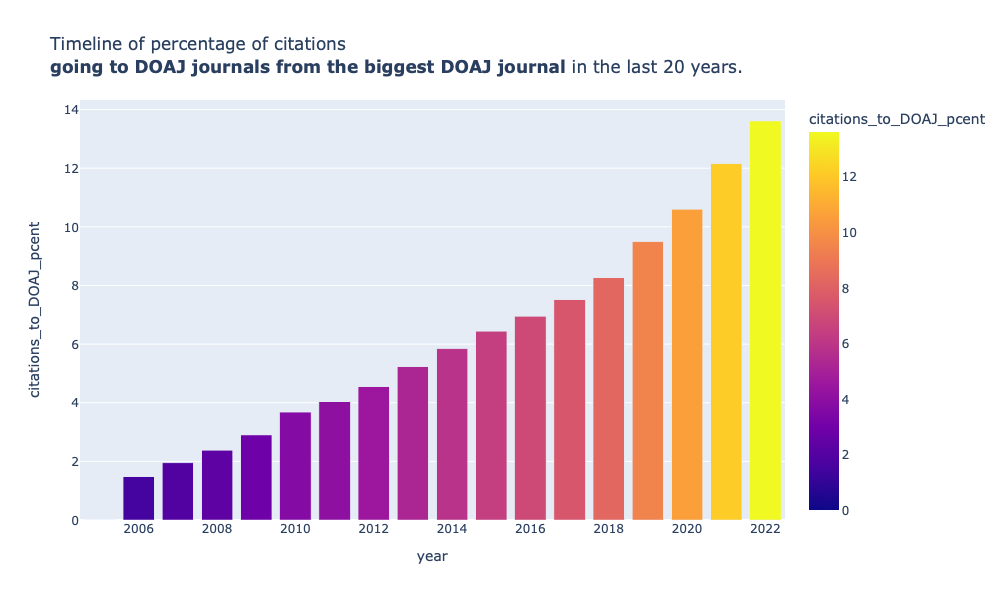

In [31]:
citto_jrnl_fig = px.bar(final_df_journal_1[-20:-2], x='year', y='citations_to_DOAJ_pcent', 
             hover_data=['citations_to_DOAJ_pcent'],
             title='Timeline of percentage of citations <br><b>going to DOAJ journals from the biggest DOAJ journal</b> in the last 20 years.', 
             color='citations_to_DOAJ_pcent',
             height=600)
citto_jrnl_fig.show()

Plotting the type of errors we encountered.

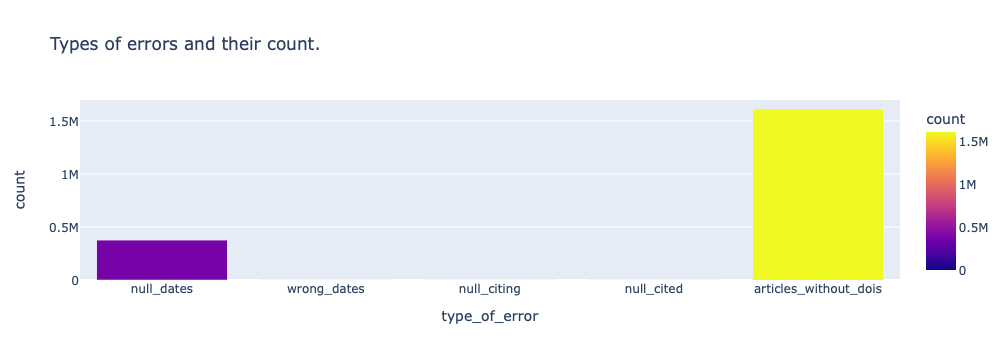

In [32]:
err_fig = px.bar(errors, x='type_of_error', y='count', 
             hover_data=['count'],
             title='Types of errors and their count.', 
             color='count')
err_fig.show()